This notebook can be run on colab: [here](https://colab.research.google.com/github/DataScience4Geoscience/Toulouse2020/blob/master/Notebooks/Introduction/N1_Linear_Classification.ipynb)

In [1]:
# Import modules
%matplotlib inline
import matplotlib
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
# Select random seed
random_state = 0

We use scikit-learn to generate a toy 2D data set 

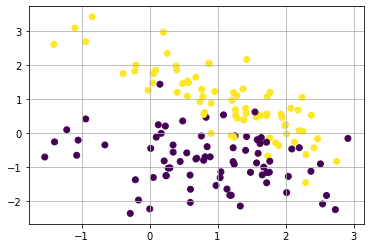

In [3]:
from sklearn.datasets import make_classification
X,y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_samples=150,
                          random_state=random_state, n_clusters_per_class=1)
y[y==0]=-1
plt.scatter(X[:,0], X[:,1], c=y)
plt.grid("on")

Then, a linear model is used to learn the classification function.

In [4]:
from sklearn import linear_model
model = linear_model.RidgeClassifier()
model.fit(X,y)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

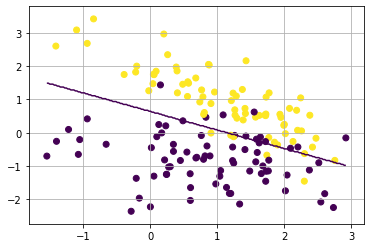

In [5]:
# Plot the decision functions
XX, YY = sp.meshgrid(sp.linspace(X[:,0].min(), X[:,0].max(),200),
                     sp.linspace(X[:,1].min(), X[:,1].max(),200))
XY = sp.vstack([XX.flatten(), YY.flatten()]).T
yp = model.predict(XY)
plt.contour(XX,YY,yp.reshape(XX.shape),[0])
plt.scatter(X[:,0], X[:,1], c=y)
plt.grid("on")

In [6]:
print(-model.coef_[0][0]/model.coef_[0][1])
print(model.intercept_)

-0.5567792434998338
[-0.4201191]
